### Part 3 - Testing difference between features prioritised by crypto and normal app users

By looking at the p-values for each of the regression models 
and also the interaction variable

[Polynomial Transformation]("https://stackoverflow.com/questions/45828964/how-to-add-interaction-term-in-python-sklearn")  
[Example Linear regression in SKlearn]("https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html")  
[Selecting columns in 2D arrays]("https://stackoverflow.com/questions/41659535/valueerror-x-and-y-must-be-the-same-size")  

In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
# Load in the CSVs
df_crypto = pd.read_csv("sent_crypto_bow.csv", index_col=0)
df_normal = pd.read_csv("sent_normal_bow.csv", index_col=0)

# Create table with the interaction terms
df_crypto["is_crypto"] = 1
df_normal["is_crypto"] = 0

In [3]:
df_crypto

,reviewId,topic,sent_pol,sent_sub,rating,is_crypto
0,40e56de6-c266-446a-89a6-5191a72324e8,N,0.025000,0.025000,4.0,1
1,7bbae22c-e255-478e-aa79-078104b23046,fee,0.337500,0.337500,1.0,1
2,c592afe5-b785-49f7-a760-c663f516d303,N,0.000000,0.000000,1.0,1
3,4d1e73a6-5209-4e16-bfd2-008da201c5c5,N,0.400000,0.400000,1.0,1
4,d1dd5332-fc37-40bd-a499-d23af117acf7,transaction,0.000000,0.000000,3.0,1
...,...,...,...,...,...,...
8938,ffac6965-3de9-4d5b-9c36-5426d925dd12,app,0.402778,0.402778,5.0,1
8939,5d11a98a-6989-4244-85f2-be72ac295040,fee,0.144444,0.144444,5.0,1
8940,e6a22ec1-d0ca-455a-b2aa-28b799fc0972,app,0.265476,0.265476,5.0,1
8941,2ba1ad26-be94-462a-a5df-8d62224abe73,transaction,-0.333333,-0.333333,1.0,1


In [4]:
df_normal

,reviewId,topic,sent_pol,sent_sub,rating,is_crypto
0,748c2355-d884-463b-8c9a-46d9e8cfa1ea,fee,0.369333,0.369333,1.0,0
1,40fe5012-ca9d-4aef-bfd5-d1a2b4de3be8,trust,0.209666,0.209666,5.0,0
2,7444c5dc-8395-4890-9c47-5f690fb6f69b,service,-0.242000,-0.242000,1.0,0
3,38b8059c-47bd-4998-9d56-fecf18663cc6,N,0.550000,0.550000,5.0,0
4,3ced6d9c-be58-4213-bdf3-ec12a750c288,N,0.125000,0.125000,1.0,0
...,...,...,...,...,...,...
7806,b28ce657-a318-454e-abd7-06d6db719655,app,0.511111,0.511111,5.0,0
7807,bdaa0b97-d095-4a04-8e5a-3b68a40d0c22,N,0.281667,0.281667,5.0,0
7808,35bc4a50-a347-44d8-bdcb-0e259b024e5b,transaction,0.700000,0.700000,4.0,0
7809,dd441a32-1fc6-47a9-b5de-adaa7901f1fa,fee,0.432552,0.432552,1.0,0


In [13]:
df_all = pd.concat([df_normal, df_crypto], ignore_index=True)
df_all

,reviewId,topic,sent_pol,sent_sub,rating,is_crypto
0,748c2355-d884-463b-8c9a-46d9e8cfa1ea,fee,0.369333,0.369333,1.0,0
1,40fe5012-ca9d-4aef-bfd5-d1a2b4de3be8,trust,0.209666,0.209666,5.0,0
2,7444c5dc-8395-4890-9c47-5f690fb6f69b,service,-0.242000,-0.242000,1.0,0
3,38b8059c-47bd-4998-9d56-fecf18663cc6,N,0.550000,0.550000,5.0,0
4,3ced6d9c-be58-4213-bdf3-ec12a750c288,N,0.125000,0.125000,1.0,0
...,...,...,...,...,...,...
16749,ffac6965-3de9-4d5b-9c36-5426d925dd12,app,0.402778,0.402778,5.0,1
16750,5d11a98a-6989-4244-85f2-be72ac295040,fee,0.144444,0.144444,5.0,1
16751,e6a22ec1-d0ca-455a-b2aa-28b799fc0972,app,0.265476,0.265476,5.0,1
16752,2ba1ad26-be94-462a-a5df-8d62224abe73,transaction,-0.333333,-0.333333,1.0,1


In [15]:
new_frame = {"reviewId":[], "service_pol":[], "app_pol":[], "transaction_pol":[], "fee_pol":[], "trust_pol":[]}

default_sent = 0
avg = dict.fromkeys(new_frame, 0)
avg.pop("reviewId")
for key in avg.keys():
    d_frame = df_all.loc[df_all["topic"] == key[:-4]]
    avg[key] = d_frame["sent_pol"].mean()

def row_apply(row):

    for key in avg.keys():
        row[key] = row["sent_pol"] if row["topic"] == key[:-4] else avg[key]
    return row;
    
new_frame = df_all.apply(row_apply, axis=1)
new_frame = new_frame.loc[new_frame["topic"] != "N"]

In [16]:
# #! Xi = feature of some sample i of all feature set X i.e. Xi = [poli, is_cryptoi]
#! When you add more 0s for each var, explainability for e.g. D_pol goes down
X = new_frame.loc[:, ["transaction_pol", "app_pol", "service_pol", "fee_pol", "trust_pol", "is_crypto"]]
Y = new_frame.loc[:, ["rating"]]

In [17]:
X

,transaction_pol,app_pol,service_pol,fee_pol,trust_pol,is_crypto
0,0.094107,0.311813,0.029141,0.369333,0.052882,0
1,0.094107,0.311813,0.029141,0.073174,0.209666,0
2,0.094107,0.311813,-0.242000,0.073174,0.052882,0
5,0.094107,0.325000,0.029141,0.073174,0.052882,0
7,0.094107,0.065865,0.029141,0.073174,0.052882,0
...,...,...,...,...,...,...
16749,0.094107,0.402778,0.029141,0.073174,0.052882,1
16750,0.094107,0.311813,0.029141,0.144444,0.052882,1
16751,0.094107,0.265476,0.029141,0.073174,0.052882,1
16752,-0.333333,0.311813,0.029141,0.073174,0.052882,1


In [18]:
Y

,rating
0,1.0
1,5.0
2,1.0
5,5.0
7,5.0
...,...
16749,5.0
16750,5.0
16751,5.0
16752,1.0


In [19]:
# Create interaction variable of degree two between the 7 vars = 7c2 + 7 = 35 
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_tr = poly.fit_transform(X)
X_tr[0] ## 3rd column = POLi * CLASSi

array([0.09410739, 0.311813  , 0.02914122, 0.36933333, 0.05288188,
       0.        , 0.02934391, 0.0027424 , 0.034757  , 0.00497658,
       0.        , 0.00908661, 0.11516293, 0.01648926, 0.        ,
       0.01076283, 0.00154104, 0.        , 0.01953104, 0.        ,
       0.        ])

In [20]:
poly.get_feature_names(X.columns)

/root/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['transaction_pol',
 'app_pol',
 'service_pol',
 'fee_pol',
 'trust_pol',
 'is_crypto',
 'transaction_pol app_pol',
 'transaction_pol service_pol',
 'transaction_pol fee_pol',
 'transaction_pol trust_pol',
 'transaction_pol is_crypto',
 'app_pol service_pol',
 'app_pol fee_pol',
 'app_pol trust_pol',
 'app_pol is_crypto',
 'service_pol fee_pol',
 'service_pol trust_pol',
 'service_pol is_crypto',
 'fee_pol trust_pol',
 'fee_pol is_crypto',
 'trust_pol is_crypto']

In [22]:
feature_names = poly.get_feature_names(X.columns)
label_indices = [0,1,2,3,4,5,10,14,17,19,20]
X_tr = X_tr[:, label_indices]

/root/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
print(len(X_tr[0]))

11


In [24]:
# Fit the model to the interaction model and get p-value
model = linear_model.LinearRegression()
model.fit(X_tr, Y)
Y_pred = model.predict(X_tr)

In [25]:
X_tr

array([[ 0.09410739,  0.311813  ,  0.02914122, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09410739,  0.311813  ,  0.02914122, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09410739,  0.311813  , -0.242     , ..., -0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.09410739,  0.26547619,  0.02914122, ...,  0.02914122,
         0.07317421,  0.05288188],
       [-0.33333333,  0.311813  ,  0.02914122, ...,  0.02914122,
         0.07317421,  0.05288188],
       [ 0.09410739,  0.19166667,  0.02914122, ...,  0.02914122,
         0.07317421,  0.05288188]])

In [26]:

import statsmodels.api as sm

X2 = sm.add_constant(X_tr)
est = sm.OLS(Y, X2)
est2 = est.fit()
xlabel = ["const"] 
for index in label_indices:
    xlabel.append(poly.get_feature_names(X.columns)[index])

# print(len(xlabel))
est2.summary(xname=xlabel)

#! Interaction model should include everything that is relevant to the dependent variable
#! i.e. include all 6 things that you use to drive the rating, and see how this differs across two apps
#! for all other online reviews that don't have a sentiment score for a given topic, put 0 to assume neutral sentiment on that particular topic.
#! Make sure to include itneraction variables between all 6 topics 6C2 interaction variables.
# TODO: Include OLS regression results for the combined regression model.
# TODO: have list of words associated with each topic and use NB to associate 
# TODO: How to convert LDA into a text classifier? https://medium.com/analytics-vidhya/text-classification-using-lda-35d5b98d4f05
#! I think the r^2 is lower than before because this time we are considering 7.7k sentences in the sample. whereas in prev we were just considering 64, which we all had data for.
# -> Imputation: use the mean? or 0? 
# TODO: try removing the subjectivity restriction + improving the text classifier so you don't get as much variation which is uncontrolled for 

# TODO: 15/7

# TODO: Look at other papers that predict mobile ratings and see what kind of control variable in those papers. e.g time, app downloads
# TODO: How t explain LDA has 6 topics e.g. explain by trial and error and found 6 have most interpretable results. OR quant approach e.g. coherence in lda (Cluster quality)
    # TODO: OR generate 50 topics, you can then manually group topics together. avoids multiple topics in same cluster problem
    # TODO: NEED TO SHOW WHY 6 topics using LDA. e.g. 6 from grouping 50 subtopics, or coherence metric
# TODO: Add more words to trust, and use larger lda topic selection.




#! Based on results below it seems that the difference between the two. 
#! I might need to increase the sample size.
#! To address underfitting - look at features/model (from book)
#! Or maybe i'm underfitting e.g. Could use the sigmoid function to fit the scatter plot better.
    #! Rationale: Shift between slightly negatie and slightly positive has a signicant impact on rating.
#! Or is it because that I should use a two tailed t test instead, if just one tail, p-value is 0.052



## https://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/

/root/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     188.9
Date:                Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:12:52   Log-Likelihood:                -14535.
No. Observations:                7799   AIC:                         2.909e+04
Df Residuals:                    7787   BIC:                         2.918e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.3602      0.076     17.919      0.000       1.211       1.509
transaction_pol               2.9286      0.307      9.531      0.000       2.326       3.531
app_pol                       2.9967      0.193     15.496      0.000       2.618       3.376
service_pol                   2.7090      0.180     15.084      0.000       2.357       3.061
fee_pol                       2.6065      0.139     18.783      0.000       2.334       2.878
trust_pol                     2.4504      0.324      7.558      0.000       1.815       3.086
is_crypto                    -0.3761      0.111     -3.381      0.001      -0.594      -0.158
transaction_pol is_crypto    -0.3515      0.375     -0.938      0.348      -1.086       0.383
app_pol is_crypto            -0.1157      0.304     -0.381      0.703      -0.711       0.480
service_pol is_crypto        -0.4494      0.238     -1.891      0.059      -0.915       0.017
fee_pol is_crypto            -0.4474      0.196     -2.286      0.022      -0.831      -0.064
trust_pol is_crypto          -0.7427      0.482     -1.542      0.123      -1.687       0.201
==============================================================================
Omnibus:                     3019.847   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.575
Skew:                           0.153   Prob(JB):                     3.48e-91
Kurtosis:                       1.910   Cond. No.                         36.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Interpreting the OLS Regression Results Sheet](https://www.youtube.com/watch?v=U7D1h5bbpcs)

In [ ]:
# Regression with single 

# TODOS to potentially improve the p-value
# -> Investigate text classification algorithm to determine if p-value is problematic
# -> Increase sample size to get more texts that are classified into Deposits/withdrawals


### Logistic regression with statsmodels

In [ ]:
Y
print(Y["rating"].max())

5.0


In [ ]:
import statsmodels.api as sm

# Add constant to X and stnadardise Y for logistic regression
X_logit = sm.add_constant(X_tr)
Y_regular = (Y["rating"] - Y["rating"].min())/(Y["rating"].max()-Y["rating"].min())

# # Build model and fit with data
sm_model = sm.Logit(Y_regular, X_logit).fit()

print(sm_model.summary)

Optimization terminated successfully.
         Current function value: 0.437870
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 rating   No. Observations:                   64
Model:                          Logit   Df Residuals:                       60
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                  0.2290
Time:                        18:32:54   Log-Likelihood:                -28.024
converged:                       True   LL-Null:                       -36.348
Covariance Type:            nonrobust   LLR p-value:                 0.0008350
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1675      0.508     -2.296      0.022      -2.164      -0.171
x1             1.0319      1.191      0.866      0.386      -1.303       3.367
x2             0.2390      0.660      0.362      0.717      -1.055       1.533
x3             2.4917      1.761      1.415      0.157      -0.959       5.943
==============================================================================
"""

In [ ]:
independent_var = X_logit[:, 1]
independent_var

array([ 0.        , -0.4375    ,  0.75      ,  0.        ,  0.6       ,
        0.275     ,  0.505     ,  0.35      ,  0.21666667, -0.33333333,
        0.6       , -0.01785714, -0.1       ,  0.        , -0.5       ,
        0.        ,  0.6       , -0.25      , -0.375     ,  0.225     ,
        0.        , -1.        , -0.7       ,  0.65      ,  0.20328526,
        0.05      , -0.5       , -0.03571429,  0.        ,  0.04791667,
        0.375     ,  0.2       , -0.38888889, -0.5       ,  0.19444444,
       -0.8       ,  0.08      , -0.2       , -0.403125  , -0.11      ,
        0.278125  , -0.4       , -0.25      , -0.25      , -0.375     ,
        0.225     , -1.        , -0.7       ,  0.475     , -1.        ,
       -0.33333333,  0.1       ,  0.33333333, -0.5       , -0.5       ,
        0.39444444,  1.        ,  0.25      , -0.8       ,  0.5       ,
        0.4       ,  0.05      , -0.06266667,  0.        ])

Optimization terminated successfully.
         Current function value: 0.598280
         Iterations 5


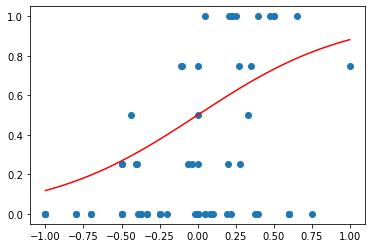

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

HOW_MANY = 100

# Plot the overall logistic regression model (i.e. without)
logit = sm.Logit(Y_regular,independent_var).fit()

# Make line function set of points s.t. (X=pred_input, Y=predictions)
pred_input = np.linspace(independent_var.min(),independent_var.max(),HOW_MANY)
predictions = logit.predict(pred_input)
plt.scatter(independent_var,Y_regular)
plt.plot(pred_input,predictions,c='red')
plt.show()

#! Not much use for logistic regression - interpretation too complex
#! logistic regression is better for binary classification
#! Use ordinal regression or normal regression
#! Could solve problem but Y = Is-Crypto,not crypto, X = sentiment on deposit/withdrawal.